In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import time

from matplotlib import pyplot as plt
from IPython import display
from IPython.display import clear_output 

In [0]:
!pip install -U tensorboard

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#ruta raiz
PATH = "/content/drive/My Drive/datasets/facades/facades"

testPATH = PATH + "/test"
trainPATH = PATH + "/train"

img_train_name = !ls -1 "{trainPATH}"
img_train_url = []

for url in img_train_name:
  url = trainPATH + '/' + url
  img_train_url.append(url)
  
print(img_train_url) # url del las imagenes de entrenamiento 


img_test_name = !ls -1 "{testPATH}"
img_test_url = []

for url in img_test_name:
  url = testPATH + '/' + url
  img_test_url.append(url)
  
print(img_test_url) # url del las imagenes de testeo

['/content/drive/My Drive/datasets/facades/facades/train/100.jpg', '/content/drive/My Drive/datasets/facades/facades/train/101.jpg', '/content/drive/My Drive/datasets/facades/facades/train/102.jpg', '/content/drive/My Drive/datasets/facades/facades/train/103.jpg', '/content/drive/My Drive/datasets/facades/facades/train/104.jpg', '/content/drive/My Drive/datasets/facades/facades/train/105.jpg', '/content/drive/My Drive/datasets/facades/facades/train/106.jpg', '/content/drive/My Drive/datasets/facades/facades/train/107.jpg', '/content/drive/My Drive/datasets/facades/facades/train/108.jpg', '/content/drive/My Drive/datasets/facades/facades/train/109.jpg', '/content/drive/My Drive/datasets/facades/facades/train/10.jpg', '/content/drive/My Drive/datasets/facades/facades/train/110.jpg', '/content/drive/My Drive/datasets/facades/facades/train/111.jpg', '/content/drive/My Drive/datasets/facades/facades/train/112.jpg', '/content/drive/My Drive/datasets/facades/facades/train/113.jpg', '/content/

In [0]:
BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [0]:
def load(image_file):
  image = tf.io.read_file(image_file)
  image = tf.image.decode_jpeg(image)

  w = tf.shape(image)[1]

  w = w // 2
  real_image = image[:, :w, :]
  input_image = image[:, w:, :]

  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

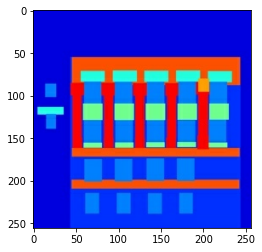

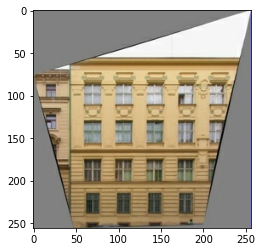

In [8]:
inp, re = load(testPATH +'/11.jpg')
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(inp/255.0)
plt.figure()
plt.imshow(re/255.0)

In [0]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [0]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [0]:
# normalizing the images to [-1, 1]

def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [0]:
@tf.function()
def random_jitter(input_image, real_image):
  # resizing to 286 x 286 x 3
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # randomly cropping to 256 x 256 x 3
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

In [0]:
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [0]:
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [0]:
def print_image(image):
  plt.figure()
  plt.imshow((image+1)/2)

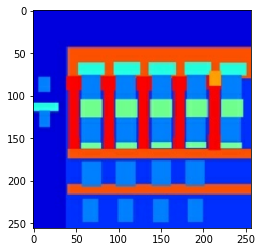

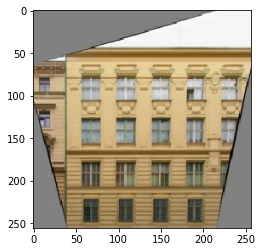

In [16]:
input_image , real_image = load_image_train(testPATH +'/11.jpg')

print_image((input_image))
print_image((real_image))



train datasets
carga de datos en tf

<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 3)), types: (tf.float32, tf.float32)>
['/content/drive/My Drive/datasets/facades/facades/train/100.jpg', '/content/drive/My Drive/datasets/facades/facades/train/101.jpg', '/content/drive/My Drive/datasets/facades/facades/train/102.jpg', '/content/drive/My Drive/datasets/facades/facades/train/103.jpg', '/content/drive/My Drive/datasets/facades/facades/train/104.jpg', '/content/drive/My Drive/datasets/facades/facades/train/105.jpg', '/content/drive/My Drive/datasets/facades/facades/train/106.jpg', '/content/drive/My Drive/datasets/facades/facades/train/107.jpg', '/content/drive/My Drive/datasets/facades/facades/train/108.jpg', '/content/drive/My Drive/datasets/facades/facades/train/109.jpg', '/content/drive/My Drive/datasets/facades/facades/train/10.jpg', '/content/drive/My Drive/datasets/facades/facades/train/110.jpg', '/content/drive/My Drive/datasets/facades/facades/train/111.jpg', '/content/drive/My Drive/datasets/facades/f

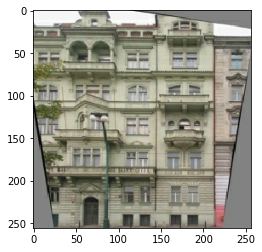

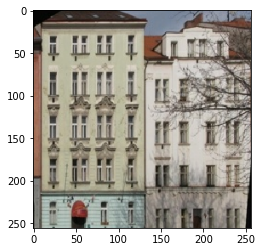

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices(img_train_url)
train_dataset = train_dataset.map(load_image_train , num_parallel_calls= tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(1)

print(train_dataset)
print(img_train_url)

for img , tgmg in train_dataset.take(2):
  print_image(tgmg[0,...])


test datasets
carga de datos en tf

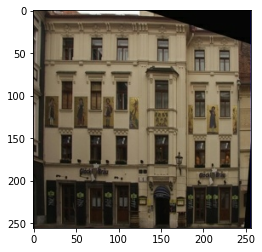

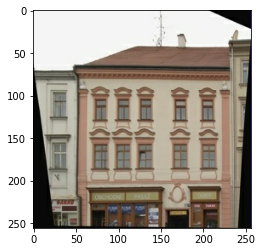

In [18]:
test_dataset = tf.data.Dataset.from_tensor_slices(img_test_url)
test_dataset = test_dataset.map(load_image_test , num_parallel_calls= tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(1)

for img , tgmg in test_dataset.take(2):
  print_image(tgmg[0,...])

**EMPEZMOS CON LA RED PIX2PIX**

**encoder**

In [19]:
from tensorflow.keras.layers import *
from tensorflow.keras import *


def downsample(filters , size = 4 , apply_batchnorm = True):

  result = Sequential()

  initializer = tf.random_normal_initializer(0. , 0.02)

  #capa convolucional
  result.add(Conv2D(filters = filters,
                    kernel_initializer = initializer,
                    kernel_size = size , 
                    strides = 2, # por cada capa la imagen se resuce a la mitad 
                    padding = "same",
                    use_bias = not apply_batchnorm)) # todos estos parametros los especifica el paper


  if apply_batchnorm:
    #capa de batcHNormalization
    result.add(BatchNormalization())

  #capa de activacion
  result.add(LeakyReLU())

  return result

downsample(64)


**decoder**

In [20]:
def upsample(filters , size = 4 ,  apply_dropout = False): # este es el decoder (encolador)

  result = Sequential()

  initializer = tf.random_normal_initializer(0. , 0.02)

  #capa convolucional INVERSA (evolucional...? idk)
  result.add(Conv2DTranspose(filters = filters,
                            kernel_initializer = initializer,
                            kernel_size = size , 
                            strides = 2, # por cada capa la imagen se resuce a la mitad 
                            padding = "same",
                            use_bias = False)) # todos estos parametros los especifica el paper

  #capa de batcHNormalization
  result.add(BatchNormalization())

  if apply_dropout:
    #cada de dropout
    result.add(Dropout(0.5))
    
  #capa de activacion
  result.add(ReLU())

  return result

upsample(64)

In [0]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256,256,3]) # capa de entrada (ancho , largo y las dimenciones rgb)

  down_stack = [
    downsample(64, 4, apply_batchnorm=False), # (bs, 128, 128, 64) (BatchSize , ancho , largo , numero de filtros    )
    downsample(128, 4),                       # (bs, 64, 64, 128)
    downsample(256, 4),                       # (bs, 32, 32, 256)
    downsample(512, 4),                       # (bs, 16, 16, 512)
    downsample(512, 4),                       # (bs, 8, 8, 512)
    downsample(512, 4),                       # (bs, 4, 4, 512)
    downsample(512, 4),                       # (bs, 2, 2, 512)
    downsample(512, 4),                       # (bs, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
    upsample(512, 4),                     # (bs, 16, 16, 1024)
    upsample(256, 4),                     # (bs, 32, 32, 512)
    upsample(128, 4),                     # (bs, 64, 64, 256)
    upsample(64, 4),                      # (bs, 128, 128, 128)
  ]


  initializer = tf.random_normal_initializer(0. , 0.02)
  last = Conv2DTranspose(filters= 3,
                         kernel_size =4,
                         strides = 2,
                         padding = "same",
                         kernel_initializer = initializer,
                         activation = "tanh") # last es la ultima capa para visualizar la imagen 
  x = inputs
  s = [] # aqui estaran las skils conections

  concat = Concatenate()

  for down in down_stack: # asi conectamos todas las capas del decodificador 
    x = down(x)
    s.append(x)


  s = reversed(s[:-1]) # quitamos la ultima capa porque no hace falta 

  for up , sk in zip(up_stack , s): # asi conectamos todas las capas del codificador
    x = up(x)
    x = concat([x,sk])
    

  last = last(x)

  return Model(inputs = inputs , outputs = last )

generator = Generator()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


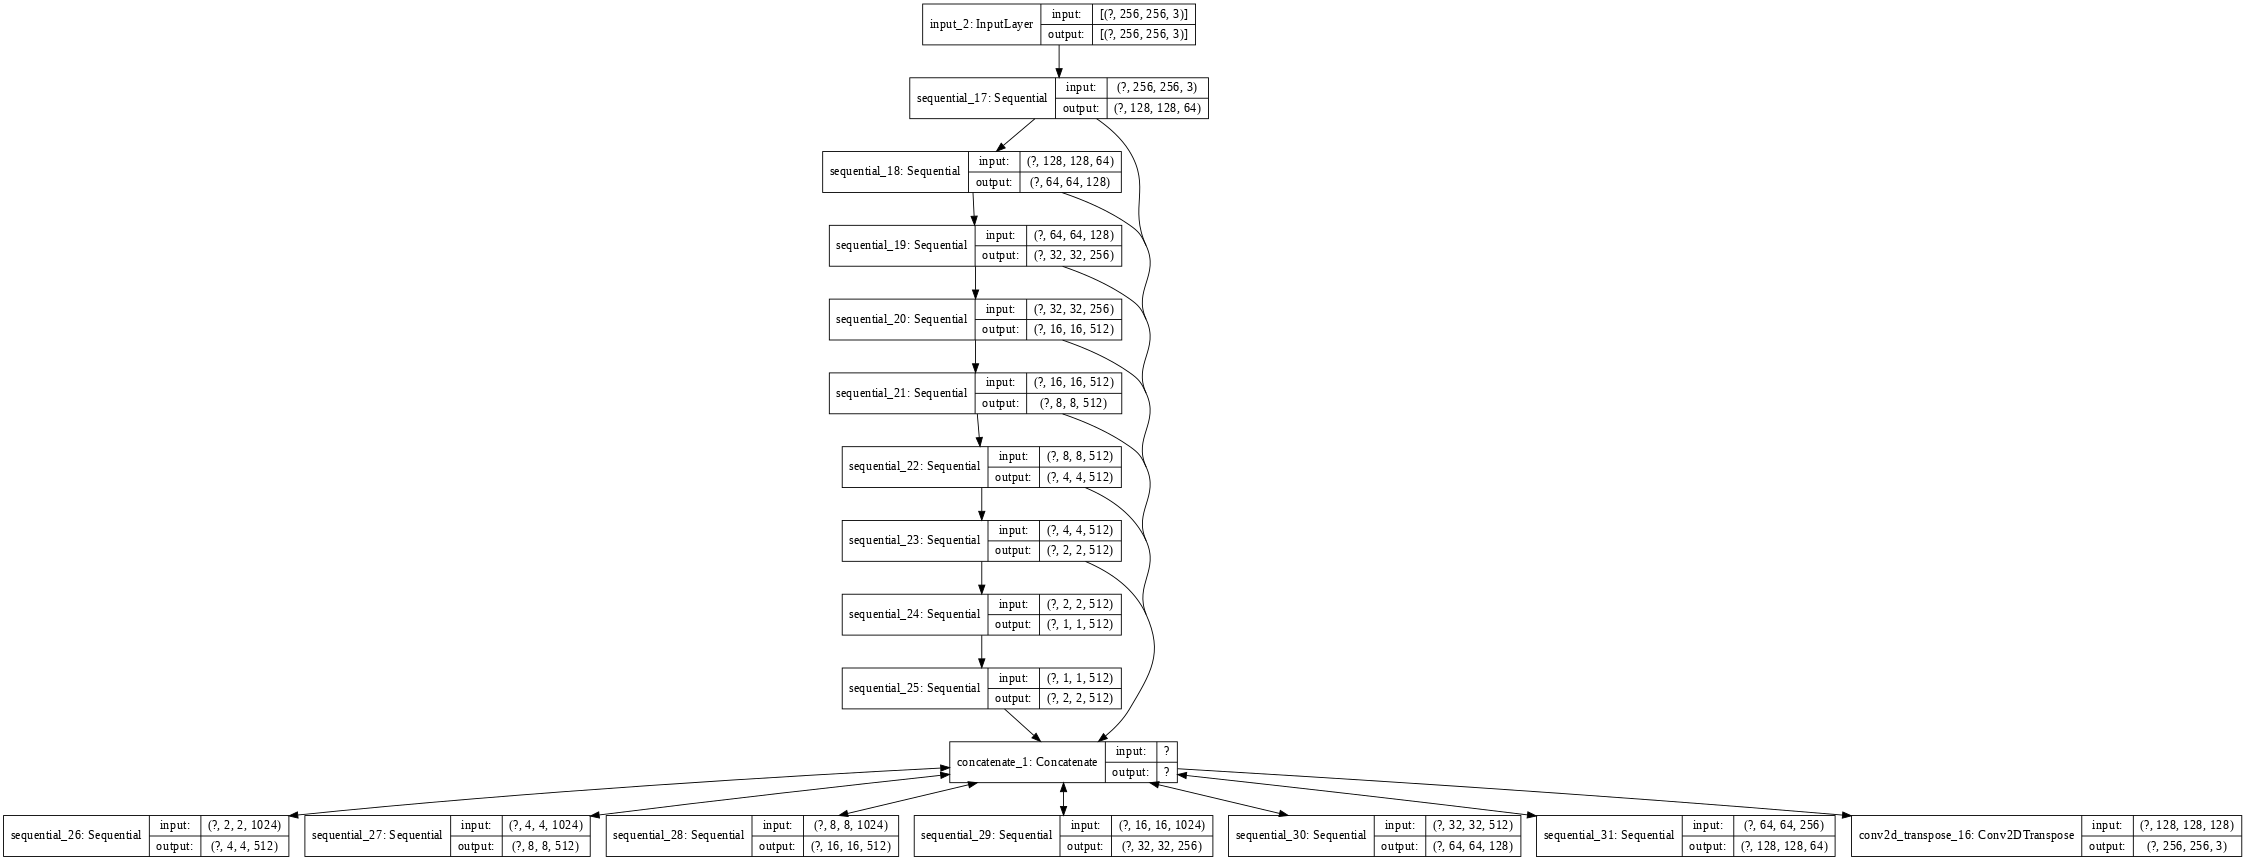

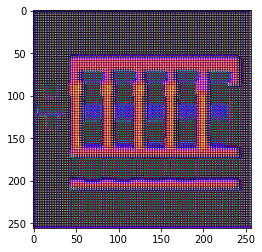

In [22]:
gen_output = generator(inp[tf.newaxis,...], training=False)
plt.imshow(gen_output[0,...])

generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

**descriminador**

In [0]:
def Discriminator():

  ini = Input(shape = [None , None , 3] , name = "input_img")
  gen = Input(shape = [None , None , 3] , name = "gener_img")

  con = concatenate([ini , gen])
  initializer = tf.random_normal_initializer(0. , 0.02)

  down1 = downsample(64, 4, False)(con) # (bs, 128, 128, 64)
  down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
  down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)
  down4 = downsample(512, 4)(down3) # (bs, 32, 32, 512)

  last = tf.keras.layers.Conv2D(filters= 1,
                                kernel_size =4,
                                strides = 1,
                                padding = "same",
                                kernel_initializer = initializer)(down4)
  
  return tf.keras.Model(inputs =[ini , gen]  , outputs = last)


discriminator = Discriminator()

TensorShape([1, 16, 16, 1])

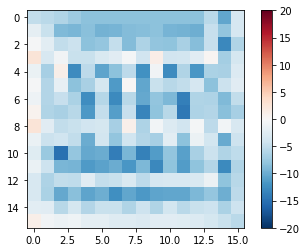

In [24]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

disc_out = discriminator([inp[tf.newaxis,...], gen_output], training=False)
plt.imshow(disc_out[0,...,-1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()
disc_out.shape

**funcion de coste**

In [0]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits= True)

In [0]:
def discriminator_loss(disc_real_output, disc_generated_output):

  #diferencia entre los true por ser real y el detectado por el discriminador  
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  #diferencia entre los false por ser generado y el detectado por el discriminador  
  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [0]:
LAMBDA = 100

In [0]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [0]:
checkpoint_dir = PATH +'/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

**GENERATE IMAGES**

In [0]:
def generate_images(model, test_input, tar , save_filename = False , number_image = 0 , epoch_number = 0):
  prediction = model(test_input, training=True)

  if save_filename:
    tf.keras.preprocessing.image.save_img(PATH + '/outputC/timelap'+ str(number_image) + '/' + str(epoch_number) + '_' + str(number_image)+ '.jpg' , prediction[0,...])

  plt.figure(figsize=(15,15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

**ENTRENAMIENTO**

In [0]:
EPOCHS = 150

In [0]:
import datetime
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [0]:
@tf.function
def train_step(input_image, target, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                              discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                                discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
    tf.summary.scalar('disc_loss', disc_loss, step=epoch)

In [0]:
def fit(train_ds, epochs, test_ds):
  for epoch in range(epochs):
    start = time.time()
    img = 0
    display.clear_output(wait=True)

    for example_input, example_target in test_ds.take(5):
      generate_images(generator, example_input, example_target ,
                      save_filename= True ,
                      number_image = img ,
                      epoch_number = epoch)
      img += 1
    print("Epoch: ", epoch)

    img = 0
    # Train
    for n, (input_image, target) in train_ds.enumerate():
      print('. ', end=''+ ' epoch: ' + str(epoch) + '- train: ' + str(img) + '/' + str(len(img_train_url)))
      img += 1
      if (n+1) % 100 == 0:
        print()
      train_step(input_image, target, epoch)
      clear_output(wait = True)

    

    # saving (checkpoint) the model every 20 epochs
    if (epoch + 1) % 20 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

      print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
  #checkpoint.save(file_prefix = checkpoint_prefix)

In [36]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))#.assert_consumed()

In [0]:
#fit(train_dataset , 400 , test_dataset) 